In [1]:
# Created by Ivana Burgetova 
# last update - November 2022
# UPA - cviko - priprava dat
# priprava souboru sales.csv


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Explorativni analyza
df = pd.read_csv("sales.csv")
df.head()

,Unnamed: 0,ID,Prod,Quant,Val,Insp
0,1,v1,p1,182.0,1665.0,unkn
1,2,v2,p1,3072.0,8780.0,unkn
2,3,v3,p1,20393.0,76990.0,unkn
3,4,v4,p1,112.0,1100.0,unkn
4,5,v3,p1,6164.0,20260.0,unkn


In [2]:
df.dtypes

Unnamed: 0      int64
ID             object
Prod           object
Quant         float64
Val           float64
Insp           object
dtype: object

In [3]:
df.describe()

,Unnamed: 0,Quant,Val
count,401146.000000,3.873040e+05,3.999640e+05
mean,205932.139662,8.441996e+03,1.461707e+04
std,118911.981823,9.183510e+05,6.971259e+04
min,1.000000,1.000000e+02,1.005000e+03
25%,102795.250000,1.070000e+02,1.345000e+03
50%,205895.500000,1.680000e+02,2.675000e+03
75%,309013.250000,7.380000e+02,8.680000e+03
max,411818.000000,4.738839e+08,4.642955e+06


In [4]:
df.describe(include = [object])

,ID,Prod,Insp
count,401146,401146,401146
unique,6016,4548,3
top,v431,p1125,unkn
freq,10159,3923,385414


In [5]:
df.ID.value_counts().head()

v431     10159
v54       6017
v426      3902
v1679     3016
v1085     3001
Name: ID, dtype: int64

In [6]:
df.Prod.value_counts().head()

p1125    3923
p3774    1824
p1437    1720
p1917    1702
p4089    1598
Name: Prod, dtype: int64

In [7]:
df.Insp.value_counts().head()

unkn     385414
ok        14462
fraud      1270
Name: Insp, dtype: int64

In [8]:
df.shape

(401146, 6)

In [9]:
df.columns

Index(['Unnamed: 0', 'ID', 'Prod', 'Quant', 'Val', 'Insp'], dtype='object')

In [10]:
df.drop(columns="Unnamed: 0", inplace = True)
df.shape

(401146, 5)

In [11]:
# Atribut UPrice a analyza jednotkovych cen
df['Uprice'] = df['Val']/df['Quant']
df.describe()

,Quant,Val,Uprice
count,3.873040e+05,3.999640e+05,387010.000000
mean,8.441996e+03,1.461707e+04,20.297586
std,9.183510e+05,6.971259e+04,111.032561
min,1.000000e+02,1.005000e+03,0.000002
25%,1.070000e+02,1.345000e+03,8.460324
50%,1.680000e+02,2.675000e+03,11.886792
75%,7.380000e+02,8.680000e+03,19.112277
max,4.738839e+08,4.642955e+06,26460.700000


In [12]:
df.describe(include = [object])

,ID,Prod,Insp
count,401146,401146,401146
unique,6016,4548,3
top,v431,p1125,unkn
freq,10159,3923,385414


In [13]:
tPrice = df.groupby(['Prod'])['Uprice'].median()
tPrice.head()

Prod
p1       11.428571
p10      42.232846
p100      5.590406
p1000     5.332342
p1001    10.250000
Name: Uprice, dtype: float64

In [14]:
# Overeni jednotkove ceny na produktu p1
p1 = df[df.Prod == 'p1']
p1.describe()

,Quant,Val,Uprice
count,175.000000,196.000000,175.000000
mean,909.205714,7190.510204,13.900498
std,2137.632559,12409.877755,8.290623
min,100.000000,1005.000000,2.201460
25%,105.000000,1100.000000,7.923804
50%,190.000000,2340.000000,11.428571
75%,493.500000,6440.000000,18.323077
max,20393.000000,76990.000000,56.178571


In [15]:
p1.shape

(210, 6)

In [16]:
# Nejlevnejsi a nejdrazsi
cheapestP = tPrice.reset_index().sort_values(['Uprice'],ascending=True)
cheapestP.head()

,Prod,Uprice
4061,p560,0.016885
4059,p559,0.018844
3551,p4195,0.030259
4107,p601,0.055223
4064,p563,0.055764


In [17]:
cheapestP.reset_index(drop=True).head()  #odstraneni puvodnich cisel radku

,Prod,Uprice
0,p560,0.016885
1,p559,0.018844
2,p4195,0.030259
3,p601,0.055223
4,p563,0.055764


In [18]:
topP = tPrice.reset_index().sort_values(['Uprice'],ascending=False)
topP.head()

,Prod,Uprice
2988,p3689,9204.195372
1616,p2453,456.078431
1615,p2452,329.313725
1619,p2456,304.851485
1622,p2459,283.811881


In [19]:
topP.reset_index(drop=True).head()  #odstraneni puvodnich cisel radku

,Prod,Uprice
0,p3689,9204.195372
1,p2453,456.078431
2,p2452,329.313725
3,p2456,304.851485
4,p2459,283.811881


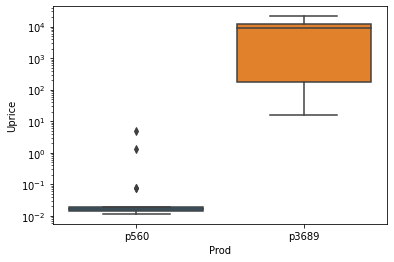

In [20]:
picked_prod = [topP.iloc[0,0], cheapestP.iloc[0,0]]
df_top_cheap = df[['Prod', 'Uprice']].loc[df['Prod'].isin(picked_prod)]
sns.boxplot(x='Prod', y='Uprice', data = df_top_cheap).set_yscale('log')
plt.show()

In [21]:
# Priprava dat
df.isna().sum()

ID            0
Prod          0
Quant     13842
Val        1182
Insp          0
Uprice    14136
dtype: int64

In [22]:
df.loc[df.Quant.isna() & df.Val.isna()].shape

(888, 6)

In [23]:
tClear = df.dropna(subset=['Quant', 'Val'], how = 'all')
tClear.isna().sum()

ID            0
Prod          0
Quant     12954
Val         294
Insp          0
Uprice    13248
dtype: int64

In [24]:
PnV = tPrice.loc[tPrice.isna()]
PnV.head()

Prod
p2442   NaN
p2443   NaN
Name: Uprice, dtype: float64

In [25]:
tClear.shape

(400258, 6)

In [26]:
tClear = tClear[tClear.Prod != 'p2442']
tClear = tClear[tClear.Prod != 'p2443']
tClear.shape

(400204, 6)

In [27]:
mFrame = pd.merge(tClear, tPrice, on = ['Prod'], how = 'inner')
mFrame.shape

(400204, 7)

In [28]:
mFrame.isna().sum()

ID              0
Prod            0
Quant       12900
Val           294
Insp            0
Uprice_x    13194
Uprice_y        0
dtype: int64

In [29]:
newF = mFrame.Quant.loc[mFrame.Quant.isna()]
newF.head()

15   NaN
34   NaN
45   NaN
53   NaN
59   NaN
Name: Quant, dtype: float64

In [30]:
mFrame.head(20)

,ID,Prod,Quant,Val,Insp,Uprice_x,Uprice_y
0,v1,p1,182.0,1665.0,unkn,9.148352,11.428571
1,v2,p1,3072.0,8780.0,unkn,2.858073,11.428571
2,v3,p1,20393.0,76990.0,unkn,3.775315,11.428571
3,v4,p1,112.0,1100.0,unkn,9.821429,11.428571
4,v3,p1,6164.0,20260.0,unkn,3.286827,11.428571
5,v810,p1,137.0,2425.0,unkn,17.700730,11.428571
6,v25,p1,217.0,3425.0,unkn,15.783410,11.428571
7,v431,p1,105.0,2385.0,unkn,22.714286,11.428571
8,v876,p1,169.0,2670.0,unkn,15.798817,11.428571
9,v260,p1,120.0,2295.0,unkn,19.125000,11.428571


In [31]:
mFrame.loc[mFrame.Quant.isna(),['Quant']] = mFrame.Val/mFrame.Uprice_y
mFrame.isna().sum()

ID              0
Prod            0
Quant           0
Val           294
Insp            0
Uprice_x    13194
Uprice_y        0
dtype: int64

In [32]:
mFrame.head(20)

,ID,Prod,Quant,Val,Insp,Uprice_x,Uprice_y
0,v1,p1,182.0000,1665.0,unkn,9.148352,11.428571
1,v2,p1,3072.0000,8780.0,unkn,2.858073,11.428571
2,v3,p1,20393.0000,76990.0,unkn,3.775315,11.428571
3,v4,p1,112.0000,1100.0,unkn,9.821429,11.428571
4,v3,p1,6164.0000,20260.0,unkn,3.286827,11.428571
5,v810,p1,137.0000,2425.0,unkn,17.700730,11.428571
6,v25,p1,217.0000,3425.0,unkn,15.783410,11.428571
7,v431,p1,105.0000,2385.0,unkn,22.714286,11.428571
8,v876,p1,169.0000,2670.0,unkn,15.798817,11.428571
9,v260,p1,120.0000,2295.0,unkn,19.125000,11.428571


In [33]:
mFrame.Quant = np.ceil(mFrame.Quant).astype(int)
mFrame.loc[mFrame.Val.isna(),['Val']] = mFrame.Quant * mFrame.Uprice_y
mFrame.isna().sum()

ID              0
Prod            0
Quant           0
Val             0
Insp            0
Uprice_x    13194
Uprice_y        0
dtype: int64

In [34]:
mFrame.sample(30)

,ID,Prod,Quant,Val,Insp,Uprice_x,Uprice_y
354712,v4522,p3734,6433,17600.0,unkn,2.735893,2.181184
333167,v1242,p3448,193,1130.0,unkn,5.854922,10.700000
199124,v5979,p2042,108,2580.0,unkn,23.888889,17.178218
95173,v1665,p1235,140,1280.0,unkn,9.142857,10.396078
58264,v3984,p958,28290,27635.0,unkn,0.976847,1.398686
263575,v96,p2732,1405,21690.0,unkn,15.437722,5.655594
325038,v250,p3367,122,1445.0,unkn,11.844262,17.164352
342331,v3659,p3600,108,1515.0,unkn,14.027778,19.385965
244070,v4577,p2416,366,2250.0,unkn,6.147541,5.559105
13860,v54,p270,778,3160.0,unkn,4.061697,1.646875


In [35]:
mFrame.loc[mFrame.Uprice_x.isna(),['Uprice_x']] = mFrame.Val / mFrame.Quant
mFrame.isna().sum()

ID          0
Prod        0
Quant       0
Val         0
Insp        0
Uprice_x    0
Uprice_y    0
dtype: int64

In [36]:
mFrame.iloc[333101,:]

ID               v705
Prod            p3446
Quant              88
Val            1035.0
Insp             unkn
Uprice_x    11.761364
Uprice_y     11.77455
Name: 333101, dtype: object

In [37]:
mFrame.drop(columns="Quant", inplace = True)
mFrame.drop(columns="Val", inplace = True)
mFrame.drop(columns="Uprice_y", inplace = True)
mFrame.sample(30)

,ID,Prod,Insp,Uprice_x
117054,v3746,p1466,unkn,10.400000
19188,v44,p394,unkn,9.807692
386734,v1146,p4090,unkn,10.750000
78983,v2735,p1125,unkn,10.396040
185295,v4157,p1940,unkn,16.616945
27354,v80,p542,unkn,2.627494
240976,v4824,p2375,unkn,6.978799
248195,v4577,p2464,unkn,9.400000
102970,v1673,p1324,unkn,15.040650
374596,v3587,p3980,unkn,7.236364
